##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Enum Quickstart

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Enum.ipynb"><img src="../images/colab_logo_32px.png?raw=1" />Run in Google Colab</a>
  </td>
</table>

The Gemini API allows you to supply a schema to define function arguments (for [function calling](../quickstarts/Function_calling.ipynb)), or to constrain its output in [JSON](../quickstarts/JSON_mode.ipynb) or using an Enum. This tutorial gives some examples using enums.

### Install dependencies

In [3]:
!pip install -q -U "google-generativeai>=0.8.0"

In [4]:
import google.generativeai as genai

import json
import dataclasses
import typing_extensions as typing

### Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [5]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## Enums

In the simplest case is you need the model to choose one option from a list of choices, use an enum class to define the schema. Ask it to identify this instrument:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111k  100  111k    0     0   688k      0 --:--:-- --:--:-- --:--:--  691k


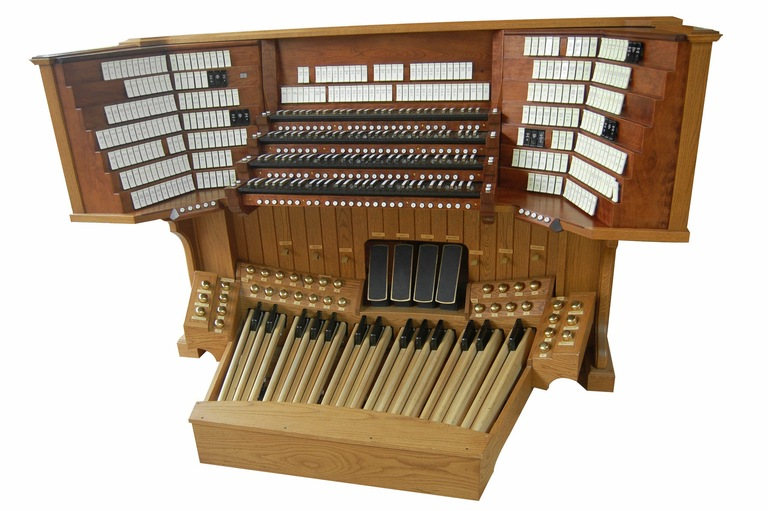

In [7]:
!curl -O https://storage.googleapis.com/generativeai-downloads/images/instrument.jpg

from PIL import Image

instrument = Image.open('instrument.jpg')
instrument

The response should be one of the following options:

In [8]:
import enum

class InstrumentClass(enum.Enum):
    PERCUSSION = "Percussion"
    STRING = "String"
    WOODWIND = "Woodwind"
    BRASS = "Brass"
    KEYBOARD = "Keyboard"

Pass the enum class as the `response_schema`, and for this simplest case you can use the `response_mime_type = "text/x.enum"` option to get one of those enum members as the response.

In [9]:
model = genai.GenerativeModel("gemini-1.5-flash-latest")


response = model.generate_content([instrument, 'what category of instrument is this?'],
                       generation_config={"response_mime_type": "text/x.enum",
                                          "response_schema":InstrumentClass})

print(response.text)

Keyboard


You can also use enums with `response_mime_type = "application/json"`. In this simple case the response will be identical but in quotes.

In [10]:
response = model.generate_content([instrument, 'what category of instrument is this?'],
                       generation_config={"response_mime_type": "application/json",
                                          "response_schema":InstrumentClass})

print(response.text)

"Keyboard" 


Outside of simple multiple choice problems, an enum can be used anywhere in the schema for [JSON](../quickstarts/JSON_mode.ipynb) or [function calling](../quickstarts/Function_calling.ipynb). For example, ask it for a list of recipe titles, and use a `Grade` enum to give each one a popularity-grade:

In [11]:
class Grade(enum.Enum):
  A_PLUS = 'a+'
  A = 'a'
  B = 'b'
  C = 'c'
  D = 'd'
  F = 'f'

class Recipe(typing.TypedDict):
  recipe_name: str
  grade: Grade

For this example you want a list of `Recipe` objects, so pass `list[Recipe]` to the `response_schema` field of the `generation_config`.

In [12]:
result = model.generate_content(
    "List about 10 cookie recipes, grade them based on popularity",
    generation_config=genai.GenerationConfig(
        response_mime_type="application/json",
        response_schema = list[Recipe]),
    request_options={"timeout": 600},
)

In [13]:
response = json.loads(result.text)
print(json.dumps(response, indent=4))

[
    {
        "grade": "a+",
        "recipe_name": "Chocolate Chip Cookies"
    },
    {
        "grade": "a",
        "recipe_name": "Oatmeal Raisin Cookies"
    },
    {
        "grade": "a",
        "recipe_name": "Snickerdoodles"
    },
    {
        "grade": "b",
        "recipe_name": "Peanut Butter Cookies"
    },
    {
        "grade": "b",
        "recipe_name": "Sugar Cookies"
    },
    {
        "grade": "c",
        "recipe_name": "Shortbread Cookies"
    },
    {
        "grade": "c",
        "recipe_name": "Gingerbread Cookies"
    },
    {
        "grade": "d",
        "recipe_name": "Macadamia Nut Cookies"
    },
    {
        "grade": "d",
        "recipe_name": "Biscotti"
    },
    {
        "grade": "f",
        "recipe_name": "Linzer Cookies"
    }
]


## Next Steps
### Useful API references:

Check the [structured ouput](https://ai.google.dev/gemini-api/docs/structured-output) documentation or the [`GenerationConfig`](https://ai.google.dev/api/generate-content#generationconfig) API reference for more details.

### Related examples

* The constrained output is used in the [Text summarization](../examples/json_capabilities/Text_Summarization.ipynb) example to provide the model a format to summarize a story (genre, characters, etc...)
* The [Object detection](../examples/Object_detection.ipynb) examples are using the JSON constrained output to uniiformize the output of the detection.

### Continue your discovery of the Gemini API

An Enum is not the only way to constrain the output of the model, you can also use an [JSON](../quickstarts/Enum.ipynb) schema. [Function calling](../quickstarts/Function_calling.ipynb) and [Code execution](../quickstarts/Code_Execution.ipynb) are other ways to enhance your model by either let him use your own functions or by letting it write and run them.